<a href="https://colab.research.google.com/github/pranayreddy713/Alfido-Tech/blob/main/TASK_NO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to import the libraries and packages required.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Next we need to load the dataset which is already given by the alfido and just copy the path and data proccessing for translated into usable information

In [4]:
df = pd.read_csv('/content/tested.csv')

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


Now we need to split the data into features and target

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']


next step is to split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building a random forest classifier and training it

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

here we printing the  count of survived and non survived people of titanic

In [12]:
y_pred = model.predict(X_test)

In [13]:

survived_count = sum(y_pred)
not_survived_count = len(y_pred) - survived_count

In [15]:
print(f'Predicted survived people : {survived_count}')
print(f'Predicted non-survived people : {not_survived_count}')


Predicted survived people : 22
Predicted non-survived people : 45


As the predicted survivors count should be visualised properly using data visualisation we can represent them in bar chat for better understanding

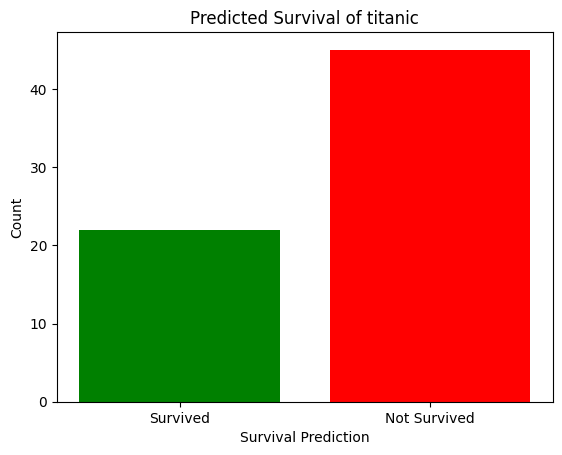

In [16]:
labels = ['Survived', 'Not Survived']
counts = [survived_count, not_survived_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Survival Prediction')
plt.ylabel('Count')
plt.title('Predicted Survival of titanic')
plt.show()